<a href="https://colab.research.google.com/github/harshitharavi26/PP1/blob/main/train_from_scratch_diseased.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import os
import cv2    
from tqdm import tqdm
import random as random
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPool2D,BatchNormalization
from keras.models import Sequential
from keras.losses import categorical_crossentropy
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [3]:
imagedetails = []
imagelabels = []
IMG_SIZE=150
diseased_dir='/content/drive/My Drive/diseased_chicken/Diseased'
healthy_dir = '/content/drive/My Drive/diseased_chicken/Healthy'

In [7]:
def read_image(label,DIR):
    
    for img in tqdm(os.listdir(DIR)):
    #for img in DIR:
        path = os.path.join(DIR,img)
        #checking image type
        _, ftype = os.path.splitext(path)
        image = cv2.imread(path,cv2.IMREAD_COLOR)
        image = cv2.resize(image, (IMG_SIZE,IMG_SIZE),interpolation = cv2.INTER_AREA)
        imagedetails.append(np.array(image))
        imagelabels.append(str(label))

read_image("Diseased",diseased_dir)
read_image("Healthy",healthy_dir)
print(imagelabels)

100%|██████████| 99/99 [00:18<00:00,  5.32it/s]

['Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Diseased', 'Diseased', 'Diseas

In [8]:
encoder = LabelEncoder()
#converting the images into arrays which will have its intensity values
X = np.array(imagedetails)
print(X)
#divide by 255 is to make the analysis easy because each color 8 plains (2^8==256)
X = X/255
print(X)
print(imagelabels)
#transformig the image labels into integers because it easy to deal with integers compared to strings;
y = encoder.fit_transform(imagelabels)
#dividing into 3 categories
y = to_categorical(y,2)
print(y)
#np.delete(X,1)
#np.delete(X,2)
print(X.shape)
print(y.shape)

[[[[253 254 251]
   [253 254 250]
   [253 254 250]
   ...
   [253 253 253]
   [253 253 253]
   [253 253 253]]

  [[253 253 253]
   [253 254 252]
   [253 254 252]
   ...
   [253 253 253]
   [253 253 253]
   [253 253 253]]

  [[253 252 255]
   [253 252 254]
   [253 252 254]
   ...
   [253 253 253]
   [253 253 253]
   [253 253 253]]

  ...

  [[253 253 253]
   [253 253 253]
   [253 253 253]
   ...
   [253 253 253]
   [253 253 253]
   [253 253 253]]

  [[253 253 253]
   [253 253 253]
   [253 253 253]
   ...
   [253 253 253]
   [253 253 253]
   [253 253 253]]

  [[253 253 253]
   [253 253 253]
   [253 253 253]
   ...
   [253 253 253]
   [253 253 253]
   [253 253 253]]]


 [[[122 198 177]
   [119 175 158]
   [165 196 182]
   ...
   [116 195 168]
   [111 190 163]
   [105 184 157]]

  [[112 190 168]
   [132 188 170]
   [182 216 202]
   ...
   [110 189 162]
   [102 181 154]
   [106 184 158]]

  [[111 190 168]
   [135 194 175]
   [181 218 202]
   ...
   [119 198 171]
   [110 189 162]
   [116 194

In [9]:

#dividing the entire dataset into training data and validation data
X_train,X_valid,y_train,y_valid = train_test_split(X,y,test_size=0.2,random_state=42)
#dividing the training dataset into training and testing
X_train,X_test,y_train,y_test = train_test_split(X_train,y_train,test_size=0.2,random_state=42)
X_train.shape,y_train.shape,X_valid.shape,y_valid.shape,X_test.shape,y_test.shape
# sum should result in total

((183, 150, 150, 3),
 (183, 2),
 (58, 150, 150, 3),
 (58, 2),
 (46, 150, 150, 3),
 (46, 2))

In [10]:

batch_size = 64
epochs = 100
num_classes = y.shape[1]

In [12]:
model = Sequential()

model.add(Conv2D(64, kernel_size=(3, 3),activation='relu',padding='same',input_shape=(IMG_SIZE,IMG_SIZE,3)))
model.add(MaxPool2D((2, 2),padding='same'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu',padding='same'))
model.add(MaxPool2D(pool_size=(2, 2),padding='same'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Conv2D(256, kernel_size=(3, 3), activation='relu',padding='same'))
model.add(MaxPool2D(pool_size=(2, 2),padding='same'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.3))
model.add(BatchNormalization())

model.add(Dense(num_classes, activation='softmax'))

In [13]:

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 64)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 75, 75, 64)        256       
_________________________________________________________________
dropout (Dropout)            (None, 75, 75, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 38, 38, 128)       0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 38, 38, 128)       5

In [14]:

model.compile(loss='categorical_crossentropy',optimizer=Adam(lr=0.001),metrics=['accuracy'])
# we need to change the binary_crossentropy to categorical when we use all images

In [15]:

imagegen = ImageDataGenerator(featurewise_center=False,
                             samplewise_center=False,
                             featurewise_std_normalization=False,
                             samplewise_std_normalization=False,
                            rotation_range=60,
                              zoom_range=0.1,
                              width_shift_range=0.1,
                              height_shift_range=0.1,
                              shear_range=0.1,
                              fill_mode='reflect')
imagegen.fit(X_train)

In [16]:
from tensorflow.keras.callbacks import ModelCheckpoint,ReduceLROnPlateau
checkpoint = ModelCheckpoint(filepath = 'cnn3.hdf5',monitor='val_accuracy' ,verbose = 1, save_best_only = True)
model_dropout = model.fit_generator(imagegen.flow(X_train,y_train, batch_size=64),epochs=epochs,verbose=2,
                          validation_data=(X_valid, y_valid),steps_per_epoch=X_train.shape[0] // batch_size,callbacks=[checkpoint],shuffle=True)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/100

Epoch 00001: val_accuracy improved from -inf to 0.58621, saving model to cnn3.hdf5
2/2 - 15s - loss: 2.3631 - accuracy: 0.6134 - val_loss: 3.5240 - val_accuracy: 0.5862
Epoch 2/100

Epoch 00002: val_accuracy did not improve from 0.58621
2/2 - 12s - loss: 4.5156 - accuracy: 0.6807 - val_loss: 1.7878 - val_accuracy: 0.5690
Epoch 3/100

Epoch 00003: val_accuracy improved from 0.58621 to 0.60345, saving model to cnn3.hdf5
2/2 - 16s - loss: 1.7963 - accuracy: 0.7656 - val_loss: 0.9084 - val_accuracy: 0.6034
Epoch 4/100

Epoch 00004: val_accuracy did not improve from 0.60345
2/2 - 12s - loss: 1.2857 - accuracy: 0.7983 - val_loss: 0.8873 - val_accuracy: 0.4483
Epoch 5/100

Epoch 00005: val_accuracy did not improve from 0.60345
2/2 - 11s - loss: 1.2409 - accuracy: 0.7815 - val_loss: 1.0887 - val_accuracy: 0.4138
Epoch 6/100

Epoch 00006: val_accuracy did not improve from 0.60345
2/2 - 12s - loss: 0.6071 - 

In [17]:
test_eval = model.evaluate(X_test, y_test, verbose=2)

2/2 - 1s - loss: 0.5139 - accuracy: 0.8043


In [18]:

y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred,axis=1).astype(int)
y_true = np.argmax(y_test,axis = 1).astype(int)

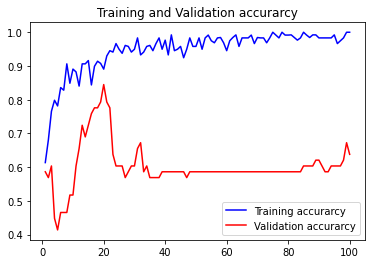

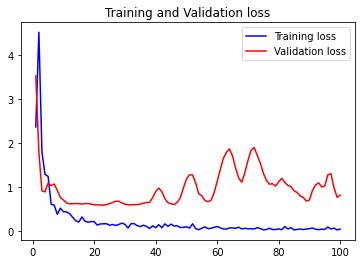

In [19]:
acc = model_dropout.history['accuracy']
val_acc = model_dropout.history['val_accuracy']
loss = model_dropout.history['loss']
val_loss = model_dropout.history['val_loss']
epochs = range(1, len(acc) + 1)
#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

In [20]:
corr=[]
incorr=[]
corr_count=0
incorr_count=0

for i in range(len(y_test)):
    if(y_pred[i]==y_true[i]):
        corr.append(i)
        corr_count+=1
    else:
        incorr.append(i)
        incorr_count+=1
        
print("Found %d correct" %(corr_count))
print("Found %d incorrect " %(incorr_count))

Found 37 correct
Found 9 incorrect 


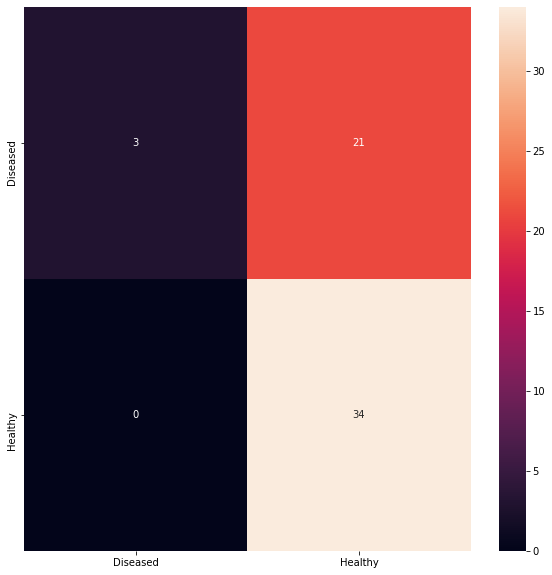

In [21]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import pandas as pd 
y_pred=model.predict(X_valid)
y_pred_classes=np.argmax(y_pred,axis=1)
y_true=np.argmax(y_valid,axis=1)
#compute conf mat
conf_mat=confusion_matrix(y_true,y_pred_classes)
#plot the con mat
f,ax=plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat,annot=True,fmt='.0f')
ax.set_xticklabels(np.unique(imagelabels))
ax.set_yticklabels(np.unique(imagelabels))
plt.show()

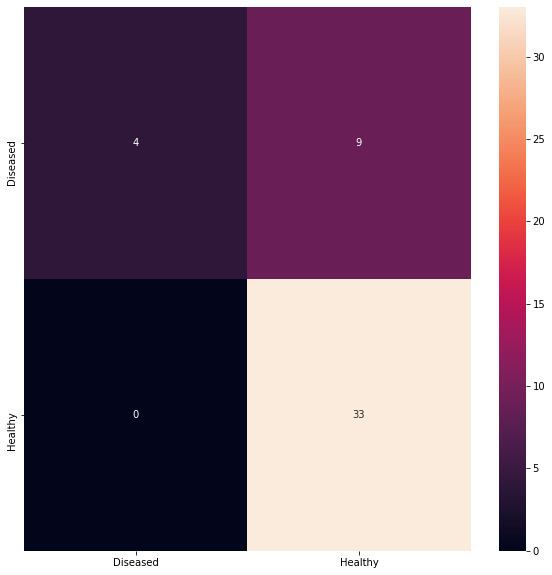

In [22]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import pandas as pd 
y_pred=model.predict(X_test)
y_pred_classes=np.argmax(y_pred,axis=1)
y_true=np.argmax(y_test,axis=1)
#compute conf mat
conf_mat=confusion_matrix(y_true,y_pred_classes)
f,ax=plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat,annot=True,fmt='.0f')
ax.set_xticklabels(np.unique(imagelabels))
ax.set_yticklabels(np.unique(imagelabels))
plt.show()